In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import os

# Load the dataset
data_path = "data/final_data_simplified.csv"  # Path to your CSV file
df = pd.read_csv(data_path)

# Clean the data
df = df.dropna()  # Remove rows with missing values
df["m/z"] = df["Mass"] / df["Charge"]  # Calculate mass-to-charge ratio

# Normalize CCS values
df["CCS_normalized"] = (df["CCS"] - df["CCS"].min()) / (df["CCS"].max() - df["CCS"].min())

# Sort charges numerically and ensure consistent order
charge_groups = sorted(df["Charge"].unique())
models = {}

# Create a figure for scatter plots
plt.figure(figsize=(12, 8))

# Loop through each charge group and print the formatted metrics
for i, charge in enumerate(charge_groups):
    # Filter data by charge
    charge_data = df[df["Charge"] == charge]
    X = charge_data[["m/z"]].values
    y = charge_data["CCS_normalized"].values

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)
    models[charge] = model

    # Predict and evaluate
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)

    # Convert MSE and MAE to percentages
    mse_percentage = mse * 100
    mae_percentage = mae * 100

    # Print evaluation metrics for the current charge group
    print(f"Charge {charge}:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print()

# Print model summary for each charge group
for charge, model in models.items():
    coef = model.coef_[0]
    intercept = model.intercept_
    print(f"Charge {charge}: y = {coef:.6f} * x + {intercept:.6e}")



Charge 1:
  Mean Squared Error (MSE): 0.0001
  Mean Absolute Error (MAE): 0.0040
  R² Score: 0.5526

Charge 2:
  Mean Squared Error (MSE): 0.0003
  Mean Absolute Error (MAE): 0.0140
  R² Score: 0.9083

Charge 3:
  Mean Squared Error (MSE): 0.0015
  Mean Absolute Error (MAE): 0.0306
  R² Score: 0.7833

Charge 4:
  Mean Squared Error (MSE): 0.0035
  Mean Absolute Error (MAE): 0.0415
  R² Score: 0.6671

Charge 1: y = -0.000079 * x + 8.214881e-02
Charge 2: y = -0.000258 * x + 4.672046e-01
Charge 3: y = -0.000381 * x + 8.090992e-01
Charge 4: y = -0.000519 * x + 1.094079e+00


<Figure size 1200x800 with 0 Axes>

In [14]:
# Sanity checks: Calculate error metrics manually
for charge, model in models.items():
    charge_data = df[df["Charge"] == charge]
    X = charge_data[["m/z"]].values
    y = charge_data["CCS_normalized"].values
    y_pred = model.predict(X)

    # Residuals
    residuals = y - y_pred
    abs_residuals = np.abs(residuals)
    squared_residuals = residuals ** 2

    # Manual calculation
    mse_manual = np.mean(squared_residuals)
    mae_manual = np.mean(abs_residuals)

    # Sanity check outputs
    print(f"Charge {charge}:")
    print(f"  Manual MSE: {mse_manual:.6e} (matches sklearn: {mean_squared_error(y, y_pred):.6e})")
    print(f"  Manual MAE: {mae_manual:.6e} (matches sklearn: {mean_absolute_error(y, y_pred):.6e})")
    print(f"  Total residual sum (abs): {np.sum(abs_residuals):.6e}")
    print(f"  Total residual sum (squared): {np.sum(squared_residuals):.6e}")
    print()


Charge 1:
  Manual MSE: 5.550305e-05 (matches sklearn: 5.550305e-05)
  Manual MAE: 3.997943e-03 (matches sklearn: 3.997943e-03)
  Total residual sum (abs): 1.417351e+02
  Total residual sum (squared): 1.967694e+00

Charge 2:
  Manual MSE: 3.426895e-04 (matches sklearn: 3.426895e-04)
  Manual MAE: 1.396150e-02 (matches sklearn: 1.396150e-02)
  Total residual sum (abs): 1.095335e+03
  Total residual sum (squared): 2.688536e+01

Charge 3:
  Manual MSE: 1.473520e-03 (matches sklearn: 1.473520e-03)
  Manual MAE: 3.061240e-02 (matches sklearn: 3.061240e-02)
  Total residual sum (abs): 8.238715e+02
  Total residual sum (squared): 3.965685e+01

Charge 4:
  Manual MSE: 3.530665e-03 (matches sklearn: 3.530665e-03)
  Manual MAE: 4.154750e-02 (matches sklearn: 4.154750e-02)
  Total residual sum (abs): 1.368575e+02
  Total residual sum (squared): 1.163001e+01



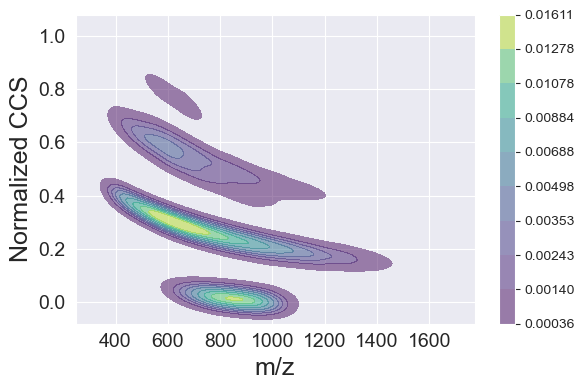

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Define the folder path
folder_path = 'pictures/simplified'
# Check if the folder exists, if not, create it
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Read the final processed data
file_path = 'data/final_data_simplified.csv'
df = pd.read_csv(file_path)

# Clean the data
df = df.dropna()  # Remove rows with missing values
df['m/z'] = df['Mass'] / df['Charge']  # Calculate mass-to-charge ratio

# Normalize CCS values
df["CCS_normalized"] = (df["CCS"] - df["CCS"].min()) / (df["CCS"].max() - df["CCS"].min())

# Create a density plot with the same colormap (viridis) and style
plt.figure(figsize=(6, 4))
sns.kdeplot(
    data=df, 
    x="m/z", 
    y="CCS_normalized", 
    cmap="viridis", 
    fill=True, 
    alpha=0.5, 
    cbar=True
)

# Style the plot to match the given example
plt.ylabel("Normalized CCS", fontsize=18)
plt.xlabel("m/z", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

# Save the plot
output_path = os.path.join(folder_path, "CCS_vs_mass_Charge_density_normalized.png")
plt.savefig(output_path, dpi=300)

# Show the plot
plt.show()


Charge 1 - Outliers (residual > 0.1):
         Sequence  Charge           CCS         Mass  Length  NumAtoms  \
12599  CSSEMYESSR       1  9.166273e-36  1234.459440      10      80.0   
30175    EMDYRQWR       1  1.283072e-35  1182.524030       8      83.0   
87141    NAQAEMGK       1  1.051246e-35   847.385802       8      58.0   

       NumRotatableBonds  FractionSP3          m/z  CCS_normalized  
12599               39.0     0.577778  1234.459440        0.088109  
30175               38.0     0.470588  1182.524030        0.177649  
87141               30.0     0.666667   847.385802        0.121003  

Charge 2 - Outliers (residual > 0.1):
                                     Sequence  Charge           CCS  \
261         AAEAAPPTQEAQGETEPTEQAPDALEQAADTSR       2  1.155142e-35   
9050                                ASVWKRLQR       2  1.447505e-35   
10830         CACAASSDESPGSKCSPEDLATAYNNRGQIK       2  1.140339e-35   
11461           CGYFYLEFAETGSVKDFGIQPVEDKGACR       2  1.137901e-3

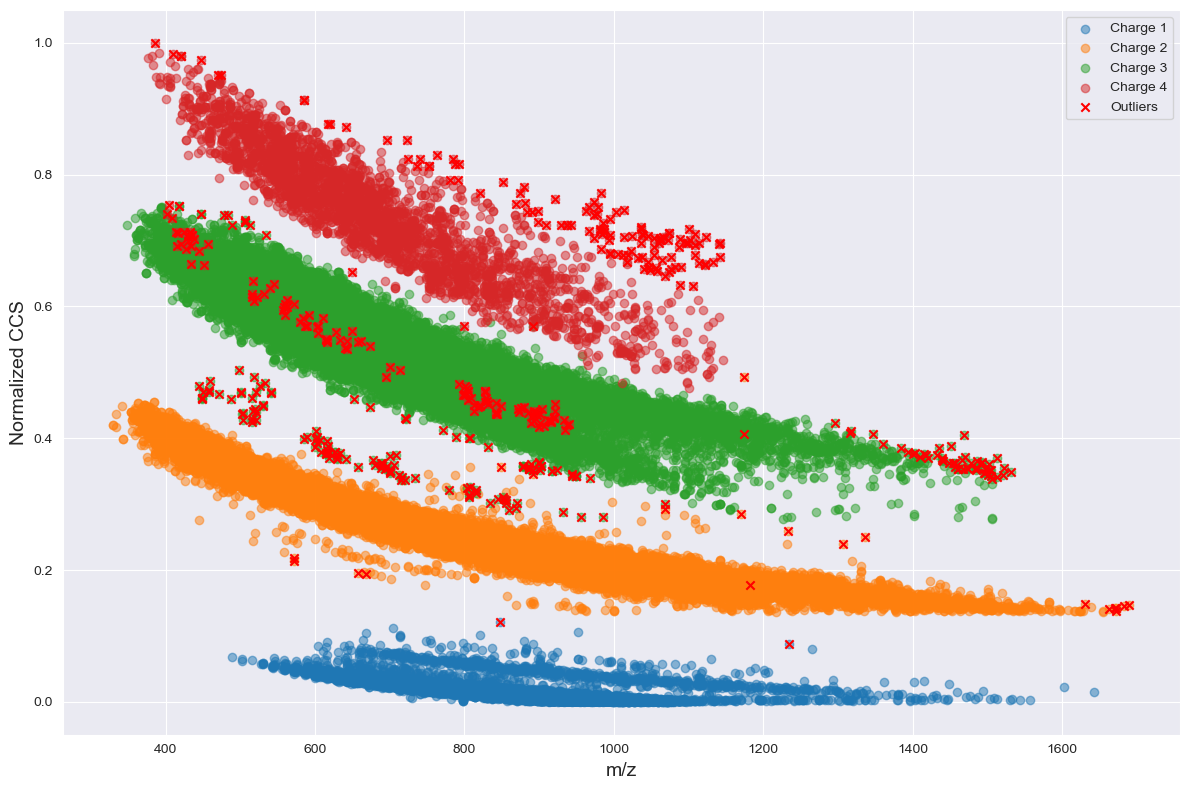

In [5]:
# Create a dictionary to store outliers for each charge group
outliers = {}

# Loop through each charge group
for charge in charge_groups:
    # Filter data by charge
    charge_data = df[df["Charge"] == charge]
    X = charge_data[["m/z"]].values
    y = charge_data["CCS_normalized"].values

    # Get the model and make predictions
    model = models[charge]
    y_pred = model.predict(X)

    # Calculate residuals
    residuals = y - y_pred

    # Define outlier threshold (absolute residual > 0.1)
    outlier_indices = np.where(np.abs(residuals) > 0.1)[0]

    # Store outliers for this charge group
    outliers[charge] = charge_data.iloc[outlier_indices]

    # Print information about outliers
    print(f"Charge {charge} - Outliers (residual > 0.1):")
    print(outliers[charge])
    print()

# Combine all outliers into a single DataFrame for further analysis
all_outliers = pd.concat(outliers.values())

# Save the outliers to a CSV file for reference
outlier_file_path = "pictures/outliers.csv"
all_outliers.to_csv(outlier_file_path, index=False)

print(f"Outliers saved to {outlier_file_path}")

# Optional: Plot outliers
plt.figure(figsize=(12, 8))
for charge in charge_groups:
    charge_data = df[df["Charge"] == charge]
    plt.scatter(charge_data["m/z"], charge_data["CCS_normalized"], label=f"Charge {charge}", alpha=0.5)

# Highlight outliers
plt.scatter(all_outliers["m/z"], all_outliers["CCS_normalized"], color="red", label="Outliers", marker="x")
plt.xlabel("m/z", fontsize=14)
plt.ylabel("Normalized CCS", fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig("pictures/outliers_highlighted.png", dpi=300)
plt.show()


Length    0
Charge    0
dtype: int64


KeyError: "['Length', 'Charge'] not in index"

In [12]:
import pandas as pd

# Load the outliers data from CSV
outliers_df = pd.read_csv("pictures/outliers.csv")

# Load the mann_bruker.txt data
mann_bruker_df = pd.read_csv("data/mann_bruker.txt", sep="\t")  # Adjust sep if necessary (e.g., space, comma)

# Use 'Sequence' and 'Charge' columns for both dataframes
outlier_sequences = outliers_df['Sequence']  # Column for sequences in outliers data
outlier_charges = outliers_df['Charge']  # Column for charges in outliers data

mann_bruker_sequences = mann_bruker_df['Sequence']  # Column for sequences in mann_bruker.txt data
mann_bruker_charges = mann_bruker_df['Charge']  # Column for charges in mann_bruker.txt data

# Create a filter for the matching sequence-charge combinations in the mann_bruker data
matching_rows = mann_bruker_df[mann_bruker_df['Sequence'].isin(outlier_sequences) & 
                               mann_bruker_df['Charge'].isin(outlier_charges)]

# For each matching sequence-charge combination, get the count and CCS values
for sequence in outlier_sequences.unique():
    for charge in outlier_charges.unique():
        # Filter rows that match both the sequence and charge
        matching_combination = matching_rows[(matching_rows['Sequence'] == sequence) & 
                                             (matching_rows['Charge'] == charge)]
        
        if not matching_combination.empty:
            # Get the count of the sequence-charge combination
            count_in_file = len(matching_combination)
            
            # Calculate the average CCS for this combination
            avg_ccs_combination = matching_combination['CCS'].mean()
            
            # Get the individual CCS values for this combination
            individual_ccs = matching_combination['CCS'].tolist()
            
            # Print the results
            print(f"Sequence: {sequence}, Charge: {charge}")
            print(f"Occurrences in mann_bruker.txt: {count_in_file}")
            print(f"Average CCS for this combination: {avg_ccs_combination}")
            print(f"Individual CCS values: {individual_ccs}")
            print()


Sequence: CSSEMYESSR, Charge: 1
Occurrences in mann_bruker.txt: 1
Average CCS for this combination: 9.16627287489894e-36
Individual CCS values: [9.16627287489894e-36]

Sequence: EMDYRQWR, Charge: 1
Occurrences in mann_bruker.txt: 1
Average CCS for this combination: 1.2830717921321e-35
Individual CCS values: [1.2830717921321e-35]

Sequence: NAQAEMGK, Charge: 1
Occurrences in mann_bruker.txt: 1
Average CCS for this combination: 1.0512463922776701e-35
Individual CCS values: [1.0512463922776701e-35]

Sequence: AAEAAPPTQEAQGETEPTEQAPDALEQAADTSR, Charge: 2
Occurrences in mann_bruker.txt: 1
Average CCS for this combination: 1.15514239390503e-35
Individual CCS values: [1.15514239390503e-35]

Sequence: AAEAAPPTQEAQGETEPTEQAPDALEQAADTSR, Charge: 3
Occurrences in mann_bruker.txt: 4
Average CCS for this combination: 2.2952864885437402e-35
Individual CCS values: [2.2903210691822201e-35, 2.2969288208252502e-35, 2.29032098207653e-35, 2.3035750820909602e-35]

Sequence: ASVWKRLQR, Charge: 2
Occurrences